In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [211]:
mynsal=pd.read_excel("C:/Users/bhara/Downloads/myntrasales.xlsx")

In [213]:
mynsal.head()


,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [215]:
mynsal.set_index('DATE',inplace=True)

In [217]:
mynsal.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


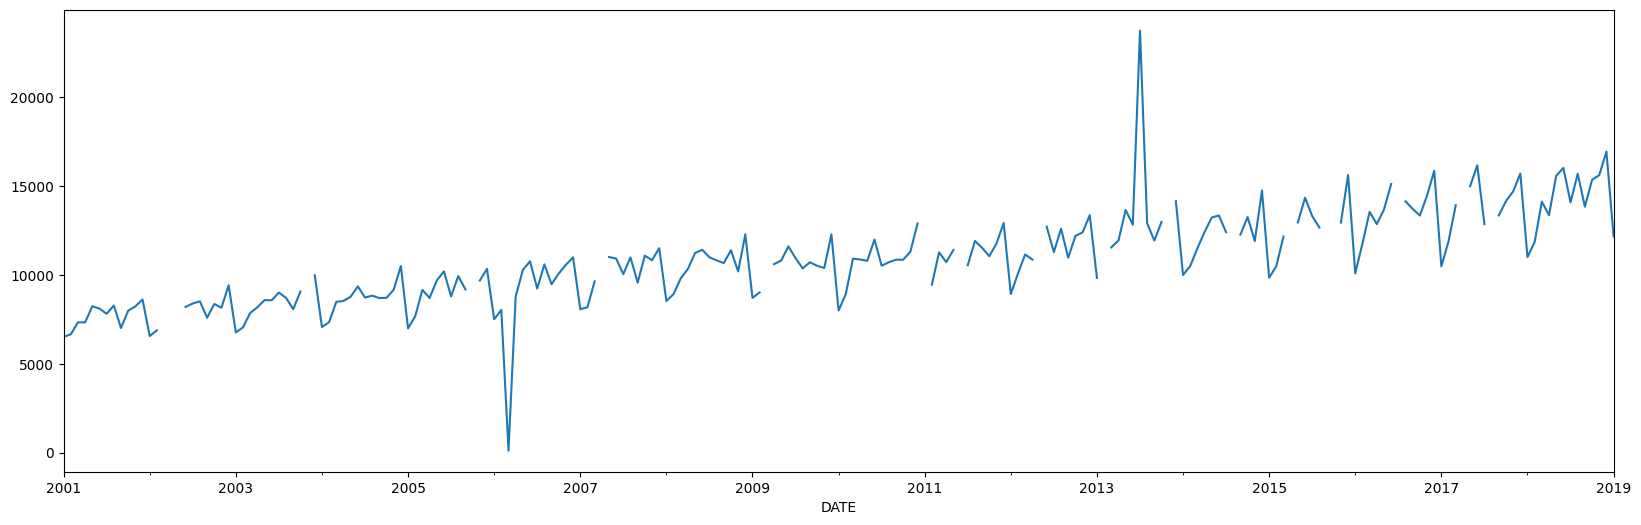

In [219]:
mynsal.Sales.plot(figsize=(20,6))
plt.show()

In [221]:
mynsal.Sales = mynsal.Sales.interpolate()

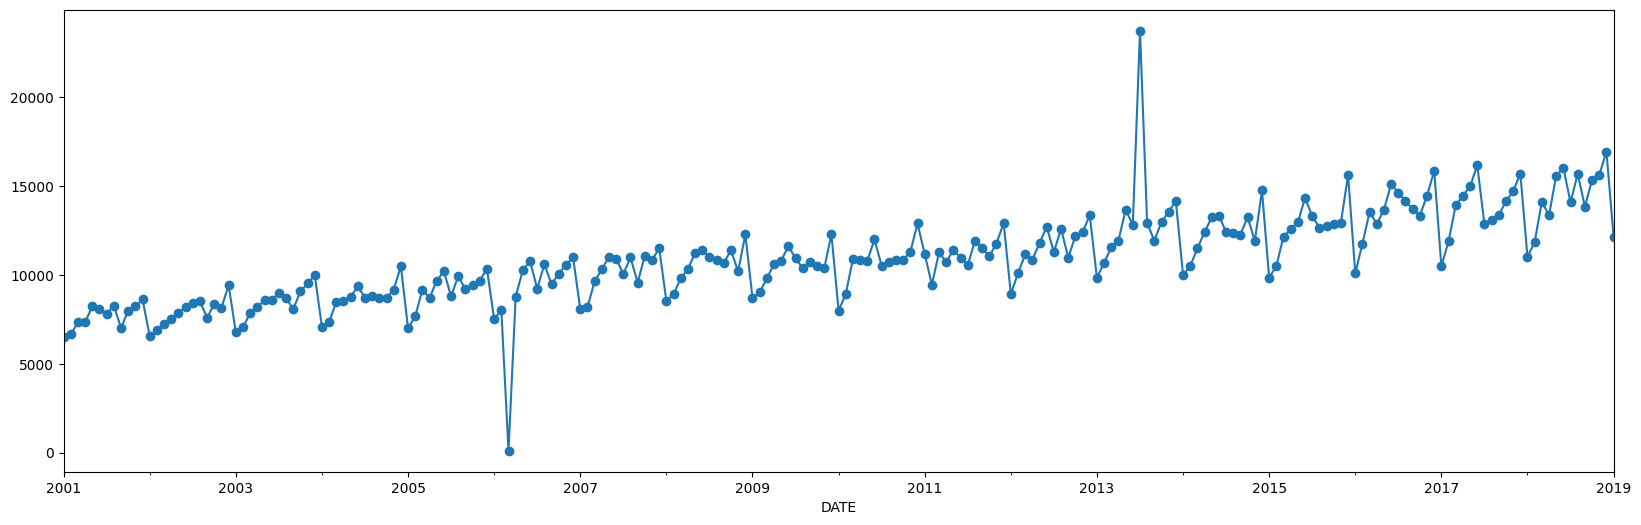

In [223]:
mynsal.Sales.plot(figsize=(20,6),style='-o')
plt.show()

In [225]:
mynsal.Sales = mynsal.Sales.clip(upper = mynsal.Sales.quantile(0.98),lower = mynsal.Sales.quantile(0.02))

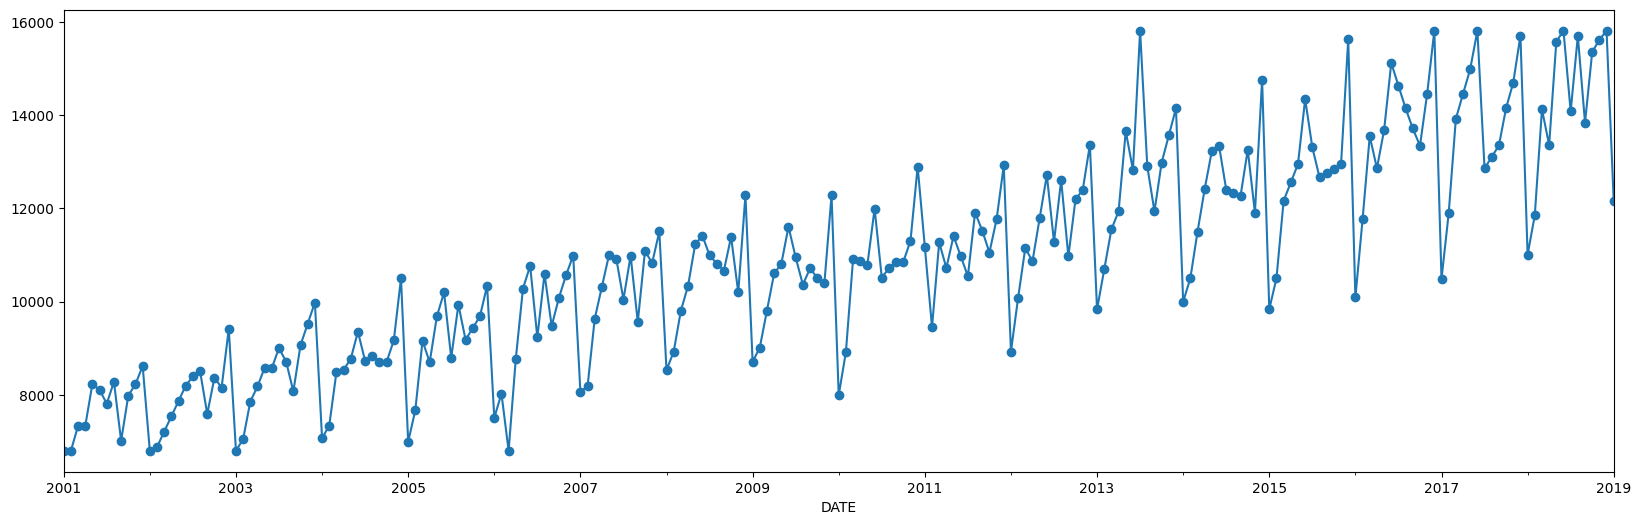

In [227]:
mynsal.Sales.plot(style = '-o',figsize=(20,6))
plt.show()

In [229]:
mynsal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 217 entries, 2001-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   217 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [231]:
Xtrain = mynsal[:-12]

In [233]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2001-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   205 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [235]:
Xtest = mynsal[-12:]

In [237]:
Xtest

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [239]:
from sklearn.metrics import mean_absolute_error as mae, mean_absolute_percentage_error as mape, mean_squared_error as mse

In [241]:
mynsal.tail()

,Sales
DATE,
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0
2018-12-01,15809.4
2019-01-01,12160.0


In [243]:
df1 = mynsal.copy()

In [246]:
df1 = pd.concat([df1,pd.DataFrame(index=pd.date_range(start = df.index[-1],periods = 13,freq='MS')[1:])])

In [248]:
df1

,Sales
2001-01-01,6802.44
2001-02-01,6802.44
2001-03-01,7332.00
2001-04-01,7332.00
2001-05-01,8240.00
...,...
2019-09-01,NaN
2019-10-01,NaN
2019-11-01,NaN
2019-12-01,NaN


In [250]:
df1.tail(20)

,Sales
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0
2018-12-01,15809.4
2019-01-01,12160.0
2019-02-01,NaN
2019-03-01,NaN


In [252]:
pred = df1.dropna().values

In [254]:
pred

array([[ 6802.44      ],
       [ 6802.44      ],
       [ 7332.        ],
       [ 7332.        ],
       [ 8240.        ],
       [ 8104.        ],
       [ 7813.        ],
       [ 8279.        ],
       [ 7014.        ],
       [ 7985.        ],
       [ 8229.        ],
       [ 8618.        ],
       [ 6802.44      ],
       [ 6882.        ],
       [ 7211.        ],
       [ 7540.        ],
       [ 7869.        ],
       [ 8198.        ],
       [ 8396.        ],
       [ 8510.        ],
       [ 7589.        ],
       [ 8366.        ],
       [ 8156.        ],
       [ 9415.        ],
       [ 6802.44      ],
       [ 7048.        ],
       [ 7856.        ],
       [ 8181.        ],
       [ 8581.        ],
       [ 8573.        ],
       [ 9008.        ],
       [ 8708.        ],
       [ 8074.        ],
       [ 9068.        ],
       [ 9524.5       ],
       [ 9981.        ],
       [ 7071.        ],
       [ 7339.        ],
       [ 8483.        ],
       [ 8536.        ],


In [256]:
for i in range(12):
    pred = np.append(pred,pred[-3:].mean())
    

In [258]:
pred[-20:]

array([15809.4       , 14080.        , 15697.        , 13838.        ,
       15351.        , 15615.        , 15809.4       , 12160.        ,
       14528.13333333, 14165.84444444, 13617.99259259, 14103.99012346,
       13962.6090535 , 13894.86392318, 13987.15436671, 13948.20911446,
       13943.40913479, 13959.59087199, 13950.40304041, 13951.13434906])

In [260]:
df1['pred']=pred

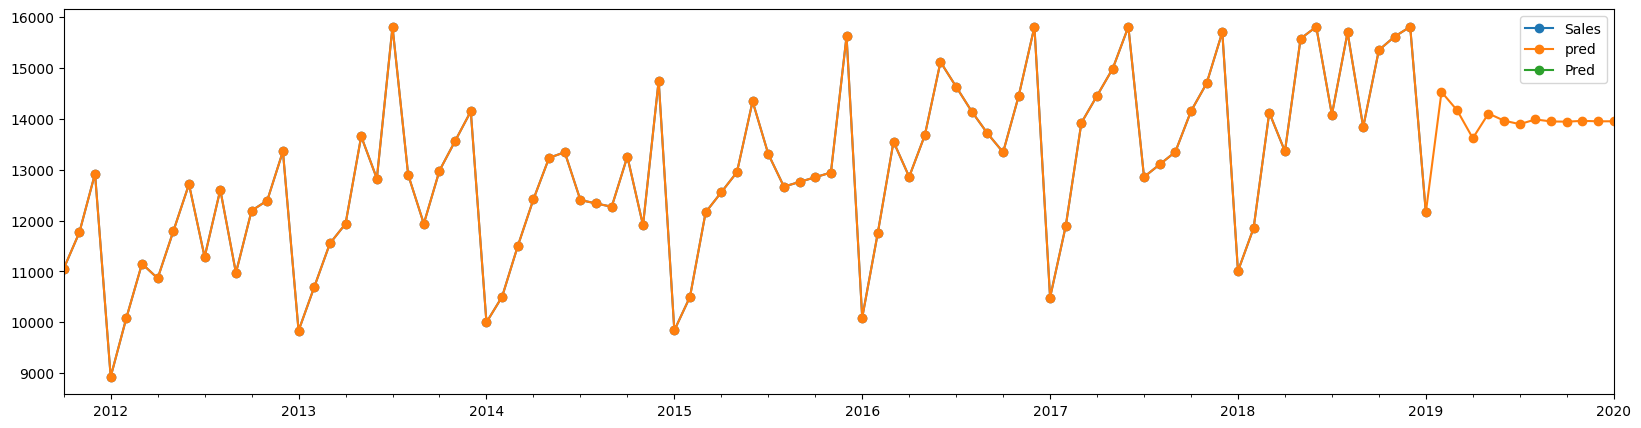

In [262]:
df1.loc[~df1['Sales'].isna(), 'Pred'] = np.nan
df1.tail(100).plot(style='-o',figsize=(20,5))
plt.show()

In [263]:
df=Xtrain.copy()

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2001-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   205 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [268]:
df.head()

,Sales
DATE,
2001-01-01,6802.44
2001-02-01,6802.44
2001-03-01,7332.00
2001-04-01,7332.00
2001-05-01,8240.00


In [270]:
df=pd.concat([df,pd.DataFrame(index=pd.date_range(start=df.index[-1],periods = 13,freq="MS")[1:])])

In [272]:
df

,Sales
2001-01-01,6802.44
2001-02-01,6802.44
2001-03-01,7332.00
2001-04-01,7332.00
2001-05-01,8240.00
...,...
2018-09-01,NaN
2018-10-01,NaN
2018-11-01,NaN
2018-12-01,NaN


In [274]:
pred = df.Sales.dropna().values

In [276]:
for i in range(12):
    pred = np.append(pred,pred[-3:].mean())

In [278]:
df["Pred"] = pred

In [280]:
Xtest["pred"] = pred[-12:]

In [282]:
Xtest

,Sales,pred
DATE,,
2018-02-01,11852.0,13802.333333
2018-03-01,14123.0,13503.777778
2018-04-01,13360.0,12770.370370
2018-05-01,15576.0,13358.827160
2018-06-01,15809.4,13210.991770
2018-07-01,14080.0,13113.396433
2018-08-01,15697.0,13227.738455
2018-09-01,13838.0,13184.042219
2018-10-01,15351.0,13175.059036


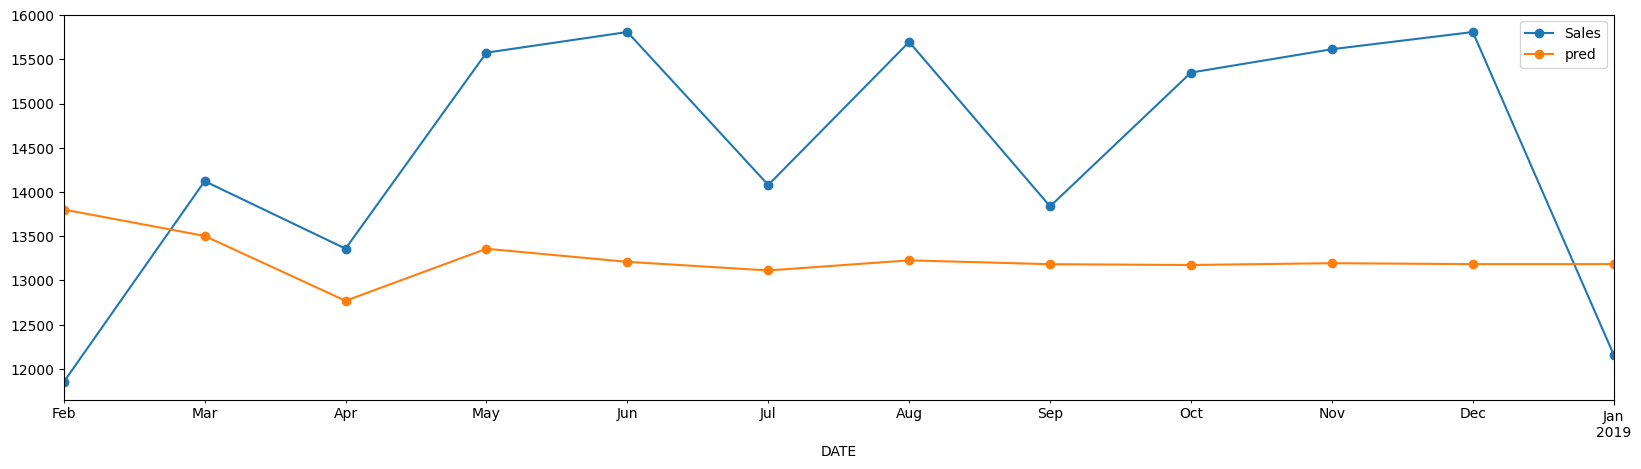

In [284]:
Xtest.plot(style="-o",figsize=(20,5))
plt.show()

In [287]:
import statsmodels.api as sm

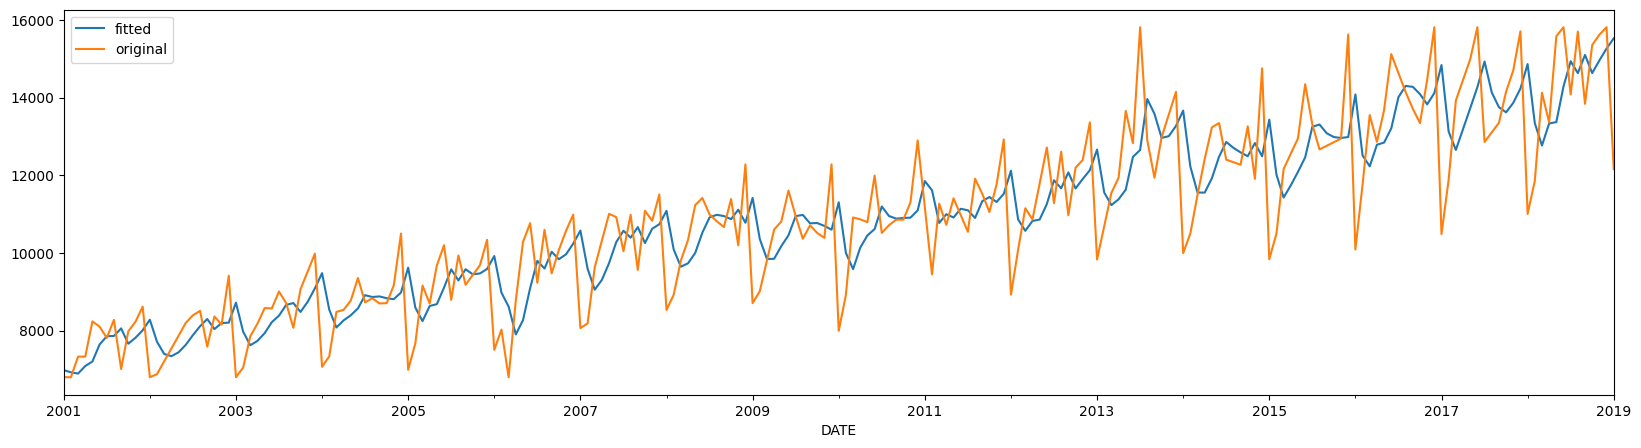

In [295]:
model = sm.tsa.ExponentialSmoothing(mynsal.Sales, trend='add').fit(smoothing_level=0.4)
model.fittedvalues.plot(label='fitted',figsize=(20,5))
mynsal.Sales.plot(label='original')
plt.legend()
plt.show()

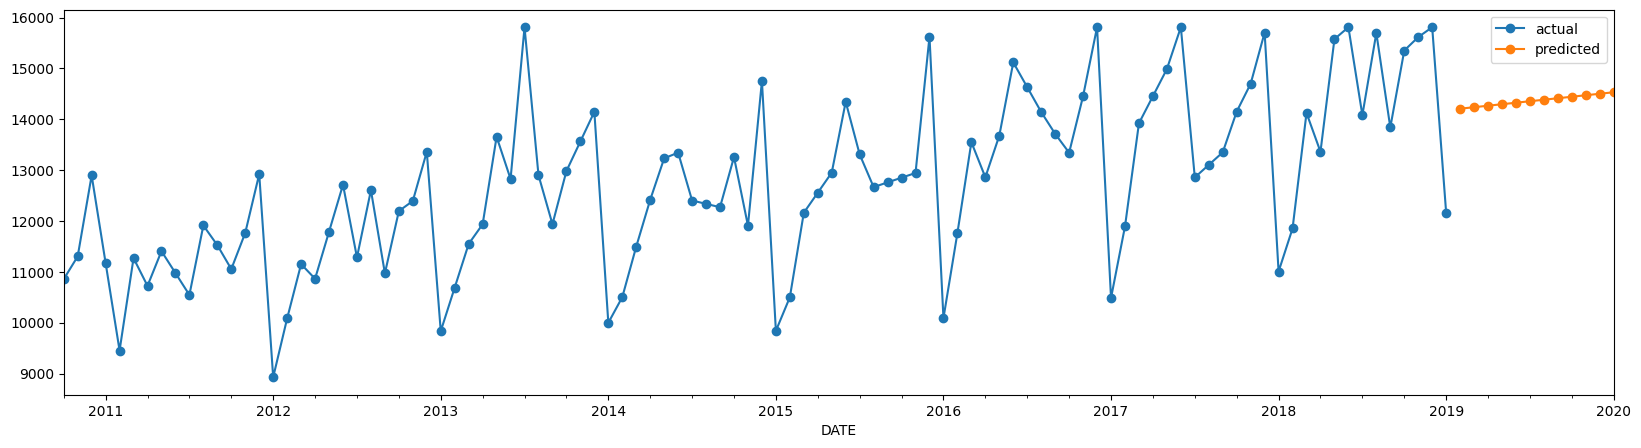

In [297]:
pred = model.forecast(steps=12)
mynsal.Sales.tail(100).plot(style ='-o',label='actual',figsize=(20,5))
pred.plot(style='-o', label='predicted')
plt.legend()
plt.show()

In [299]:
model=sm.tsa.ExponentialSmoothing(mynsal.Sales,trend="add",seasonal="add").fit(smoothing_level=(1/24))


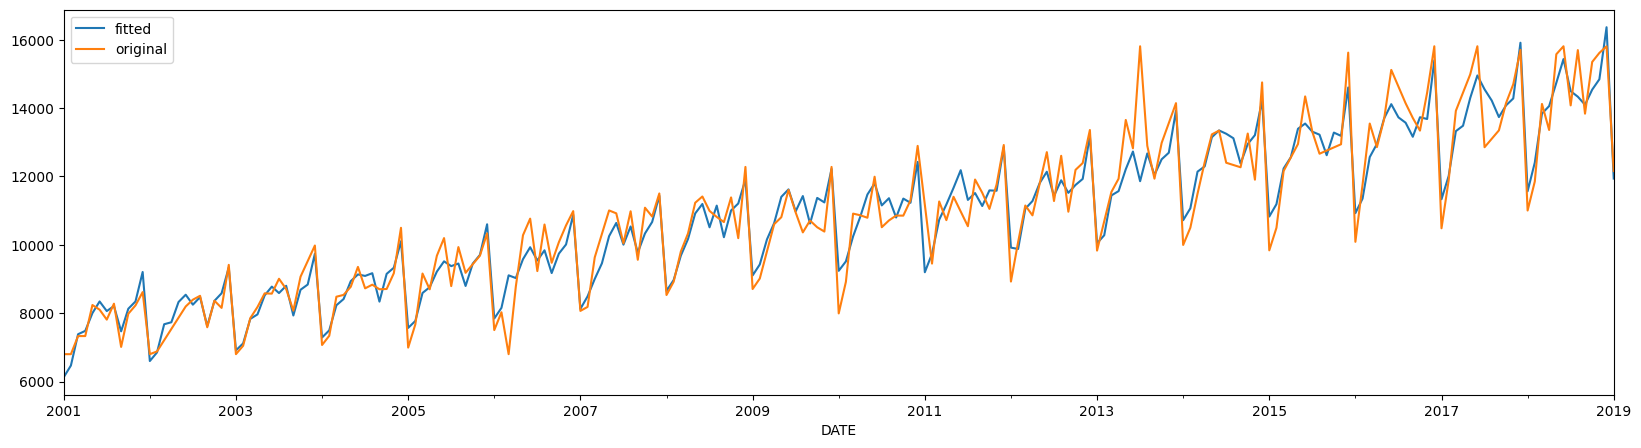

In [303]:
model.fittedvalues.plot(label='fitted',figsize=(20,5))
mynsal.Sales.plot(label='original')
plt.legend()
plt.show()

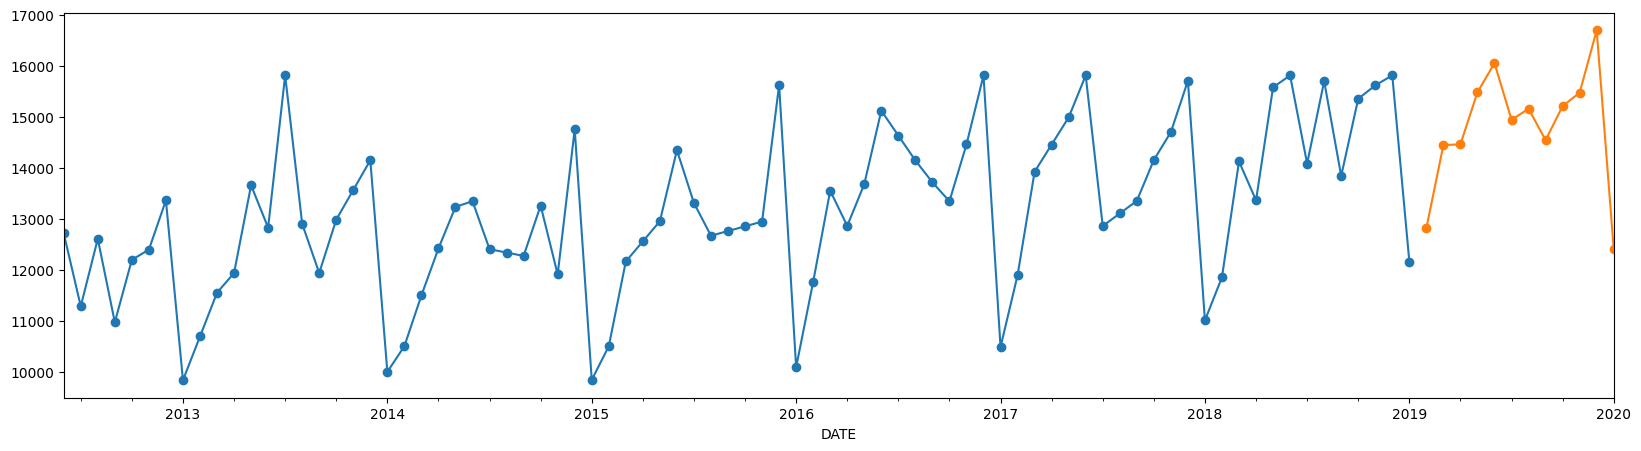

In [305]:
preds = model.forecast(steps=12)
mynsal.Sales.tail(80).plot(style='-o',figsize=(20,5))
preds.plot(style='-o')
plt.show()

## Holt-Winter's

In [307]:
model = sm.tsa.ExponentialSmoothing(Xtrain.Sales,trend='add',seasonal='add').fit(smoothing_level=(1/24))
preds = model.forecast(steps=12)
Xtest["pred"]=preds

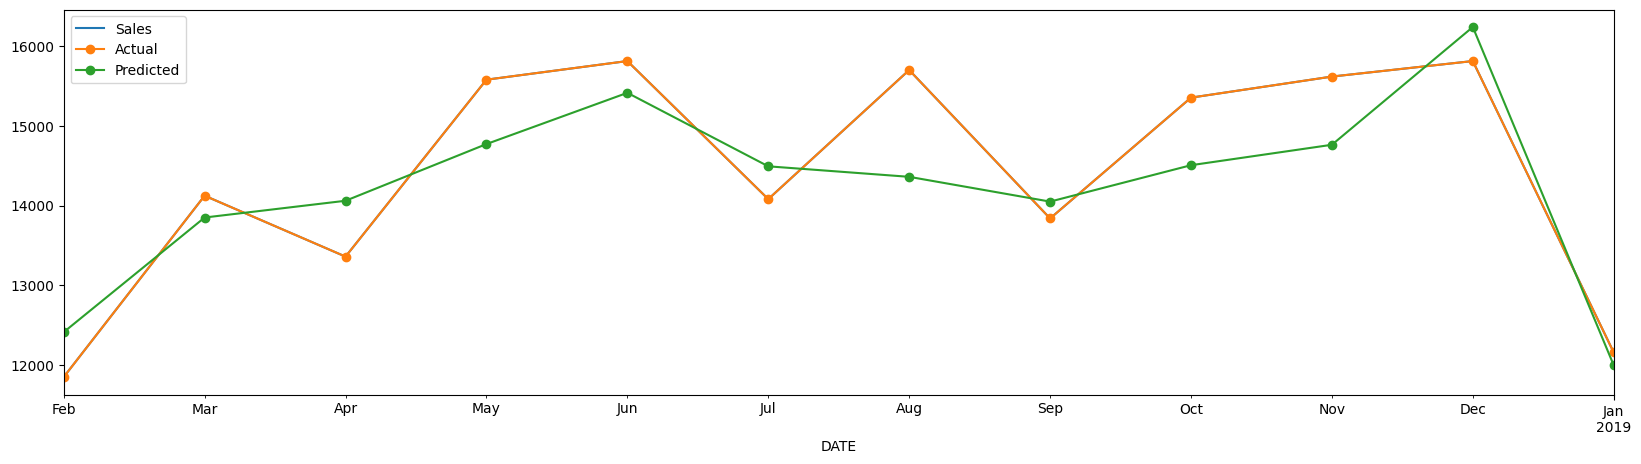

In [315]:
Xtest["Sales"].plot(label='Actual',figsize=(20,5),style='-o')
Xtest["pred"].plot(label='Predicted',figsize=(20,5),style='-o')
plt.legend()
plt.show()

In [323]:
def error_cal(act,pred):
    print(f"RMSE = {np.sqrt(mse(act,pred))}")
    print(f"MAPE = {mape(act,pred)}")
    print(f"MAE = {mae(act,pred)}")

In [325]:
error_cal(Xtest["Sales"],Xtest["pred"])

RMSE = 667.3541927352873
MAPE = 0.039644253777533896
MAE = 582.1721778492806


## ADF Test

In [327]:
sm.tsa.adfuller(mynsal.Sales)

(0.3356767272520866,
 0.9789233920172062,
 12,
 204,
 {'1%': -3.462818103072159,
  '5%': -2.8758145932936805,
  '10%': -2.574378674548251},
 3251.797804662589)

In [339]:
def adftest(col):
    if sm.tsa.adfuller(col)[1]<=0.05:
        print("Stationary")
    else:
        print("Not Stationary")

In [341]:
adftest(mynsal.Sales)

Not Stationary


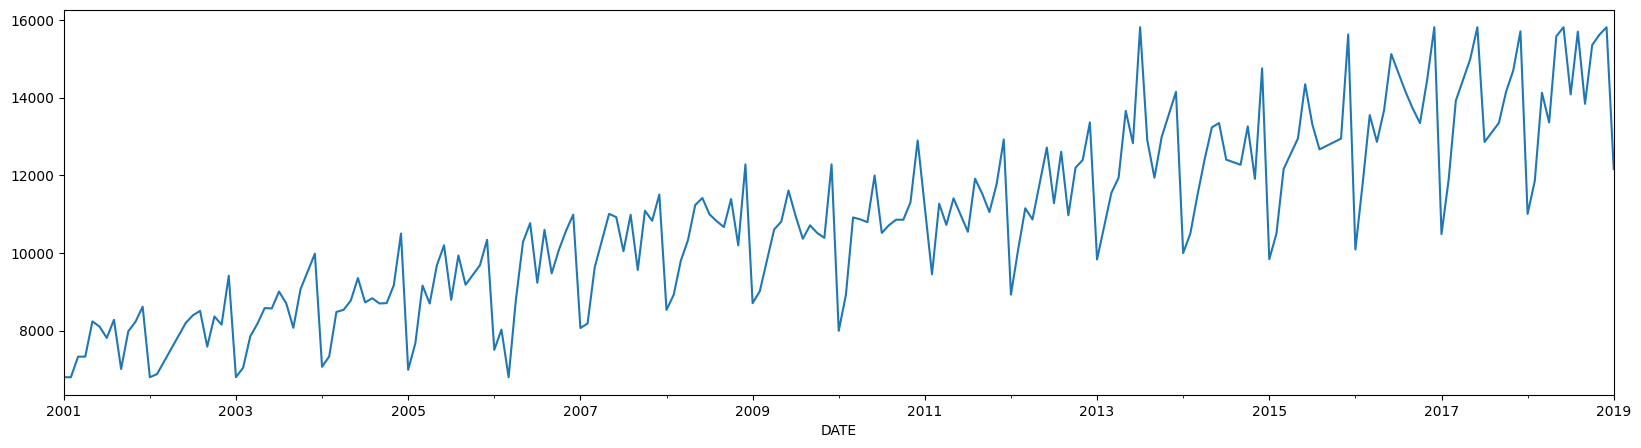

In [352]:
mynsal.Sales.plot(figsize=(20,5))
plt.show()

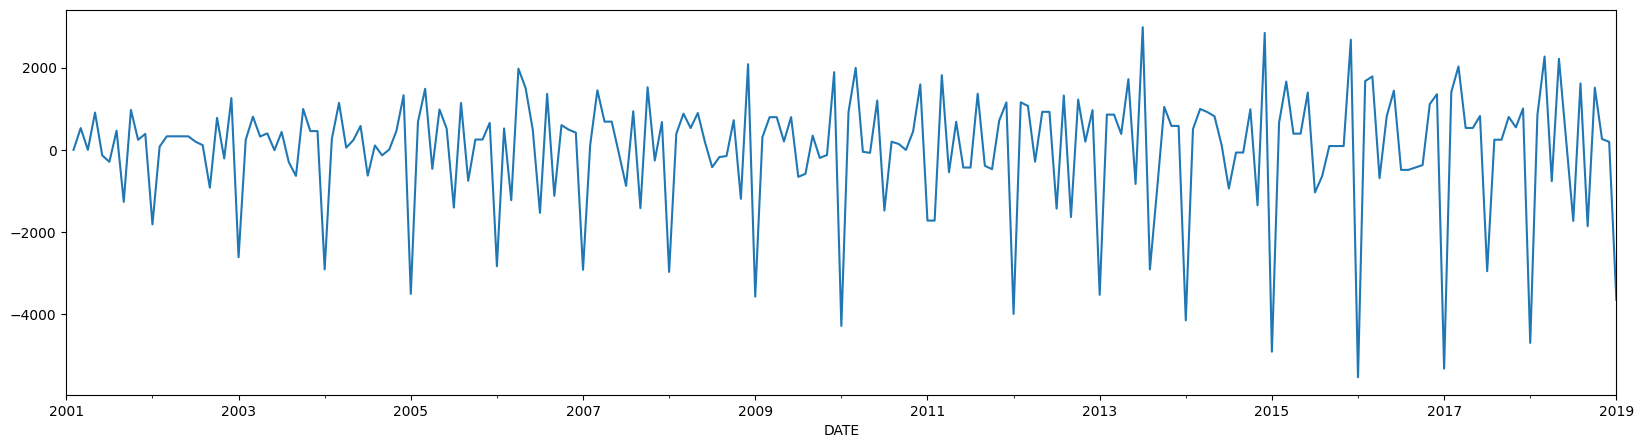

In [356]:
mynsaldetrend = mynsal.Sales.diff()
mynsaldetrend.plot(figsize=(20,5))
plt.show()

In [366]:
adftest(mynsaldetrend.dropna())

Stationary


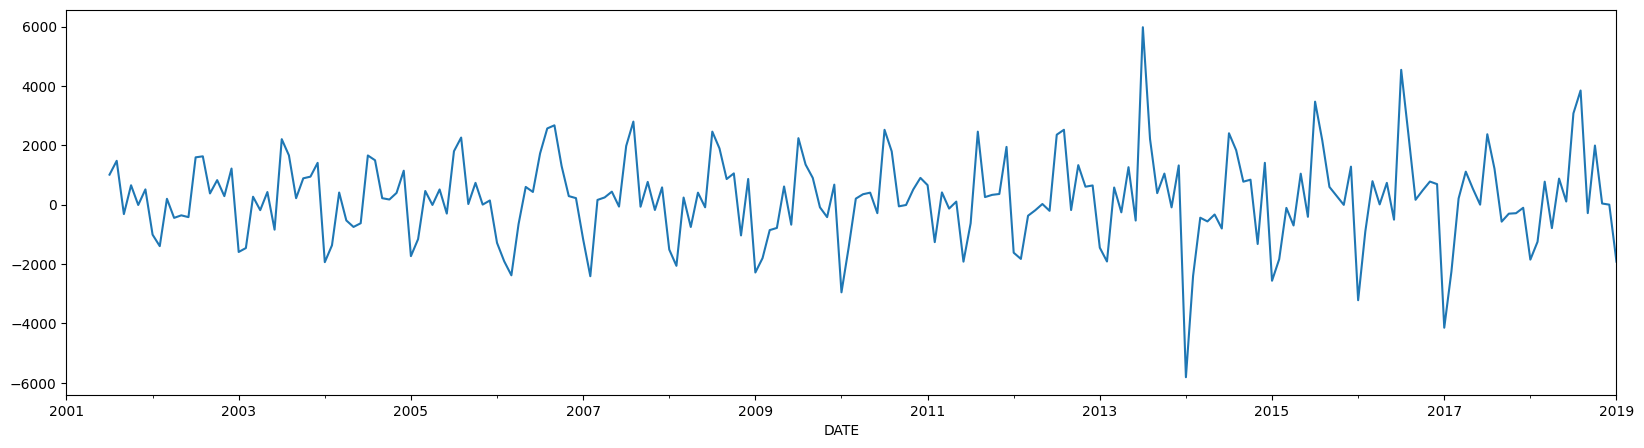

Stationary


In [370]:
mynsaldeseas = mynsal.Sales.diff(6)
mynsaldeseas.plot(figsize=(20,5))
plt.show()
adftest(mynsaldeseas.dropna())

#  ACF & PACF

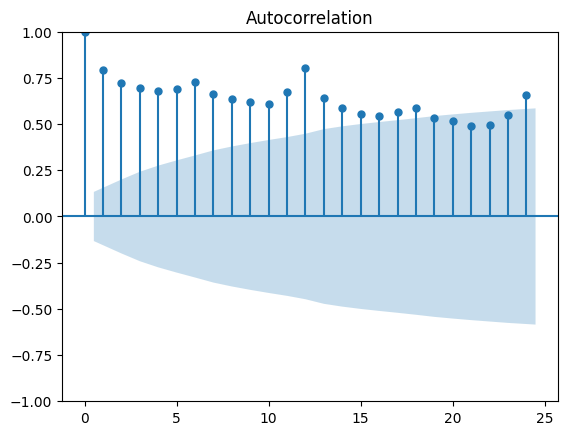

In [381]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(mynsal.Sales)

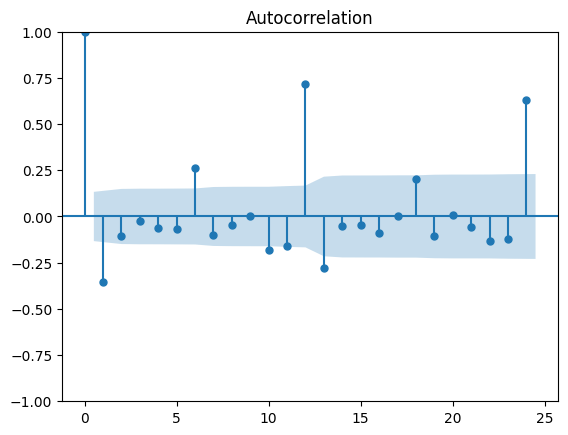

In [395]:
plot_acf(mynsal.Sales.diff().dropna())

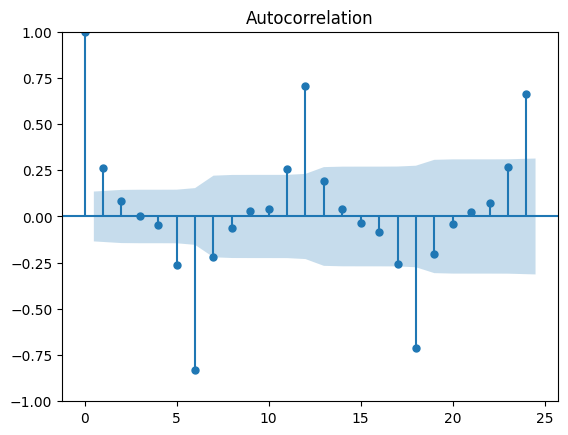

In [397]:
plot_acf(mynsal.Sales.diff(6).dropna())

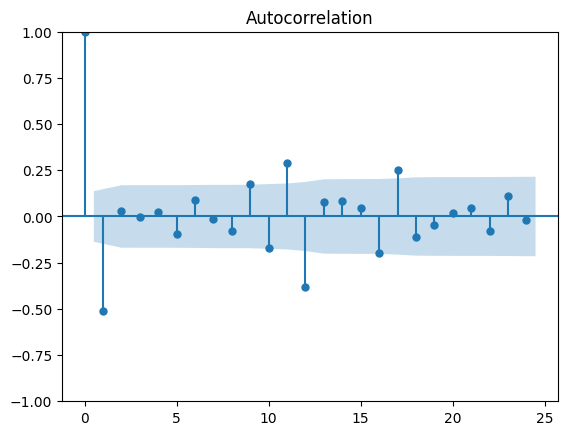

In [399]:
plot_acf(mynsal.Sales.diff().diff(12).dropna())

## PACF

In [453]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

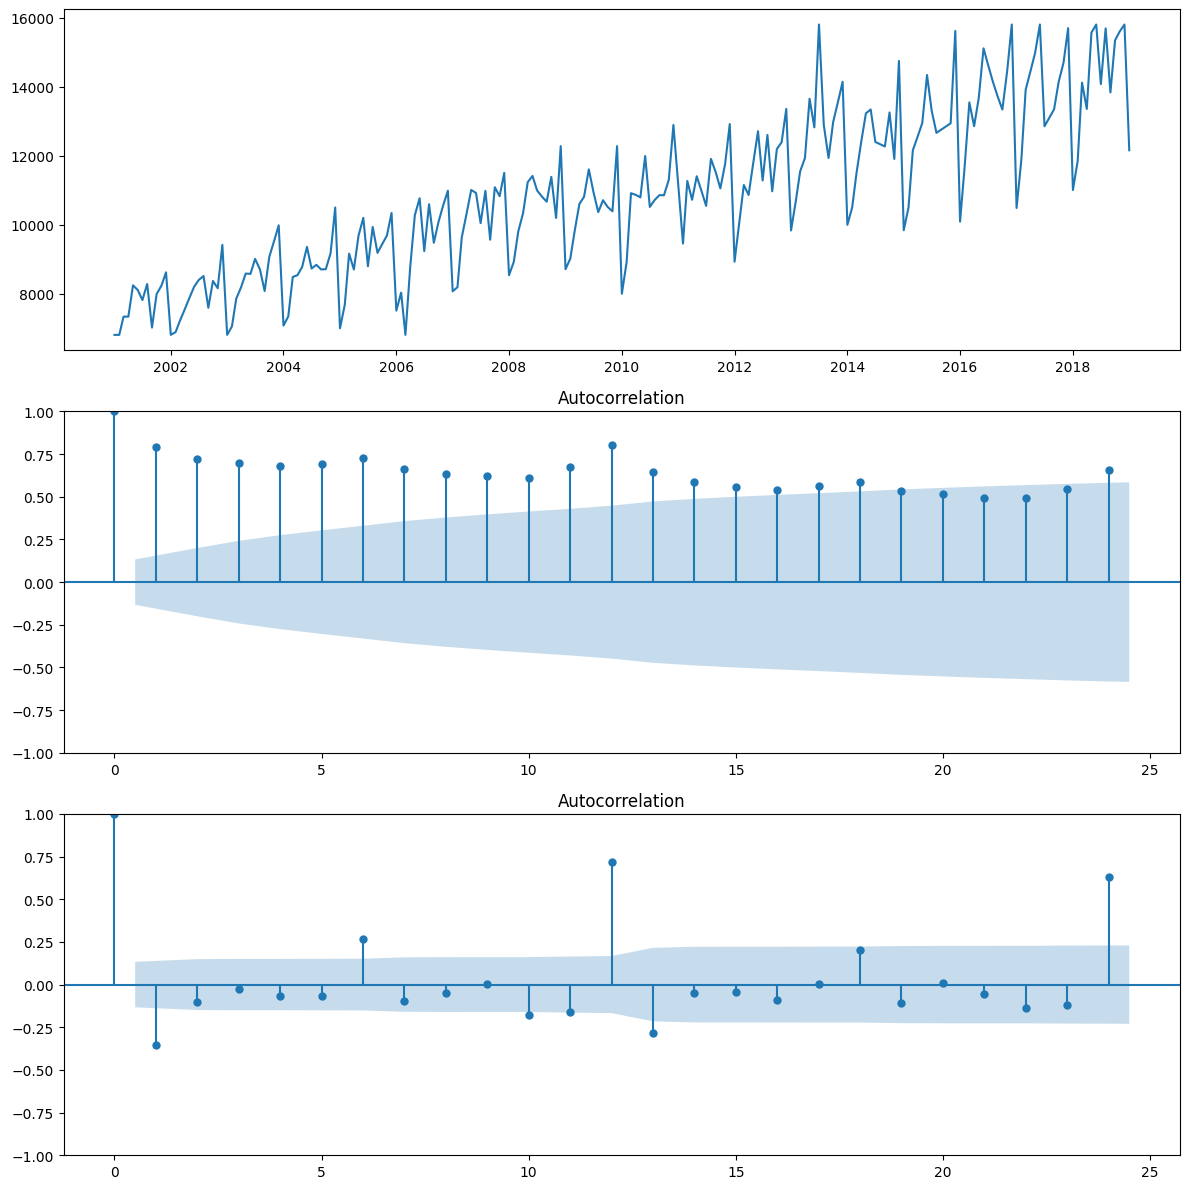

In [455]:
axes[0].plot(mynsal.Sales)
plot_pacf(mynsal.Sales,ax=axes[1])
plot_pacf(mynsal.Sales.diff().dropna(),ax=axes[2])
plt.tight_layout()
plt.show()

In [477]:
fig, axes = plt.subplots(4, 1, figsize=(12, 15))

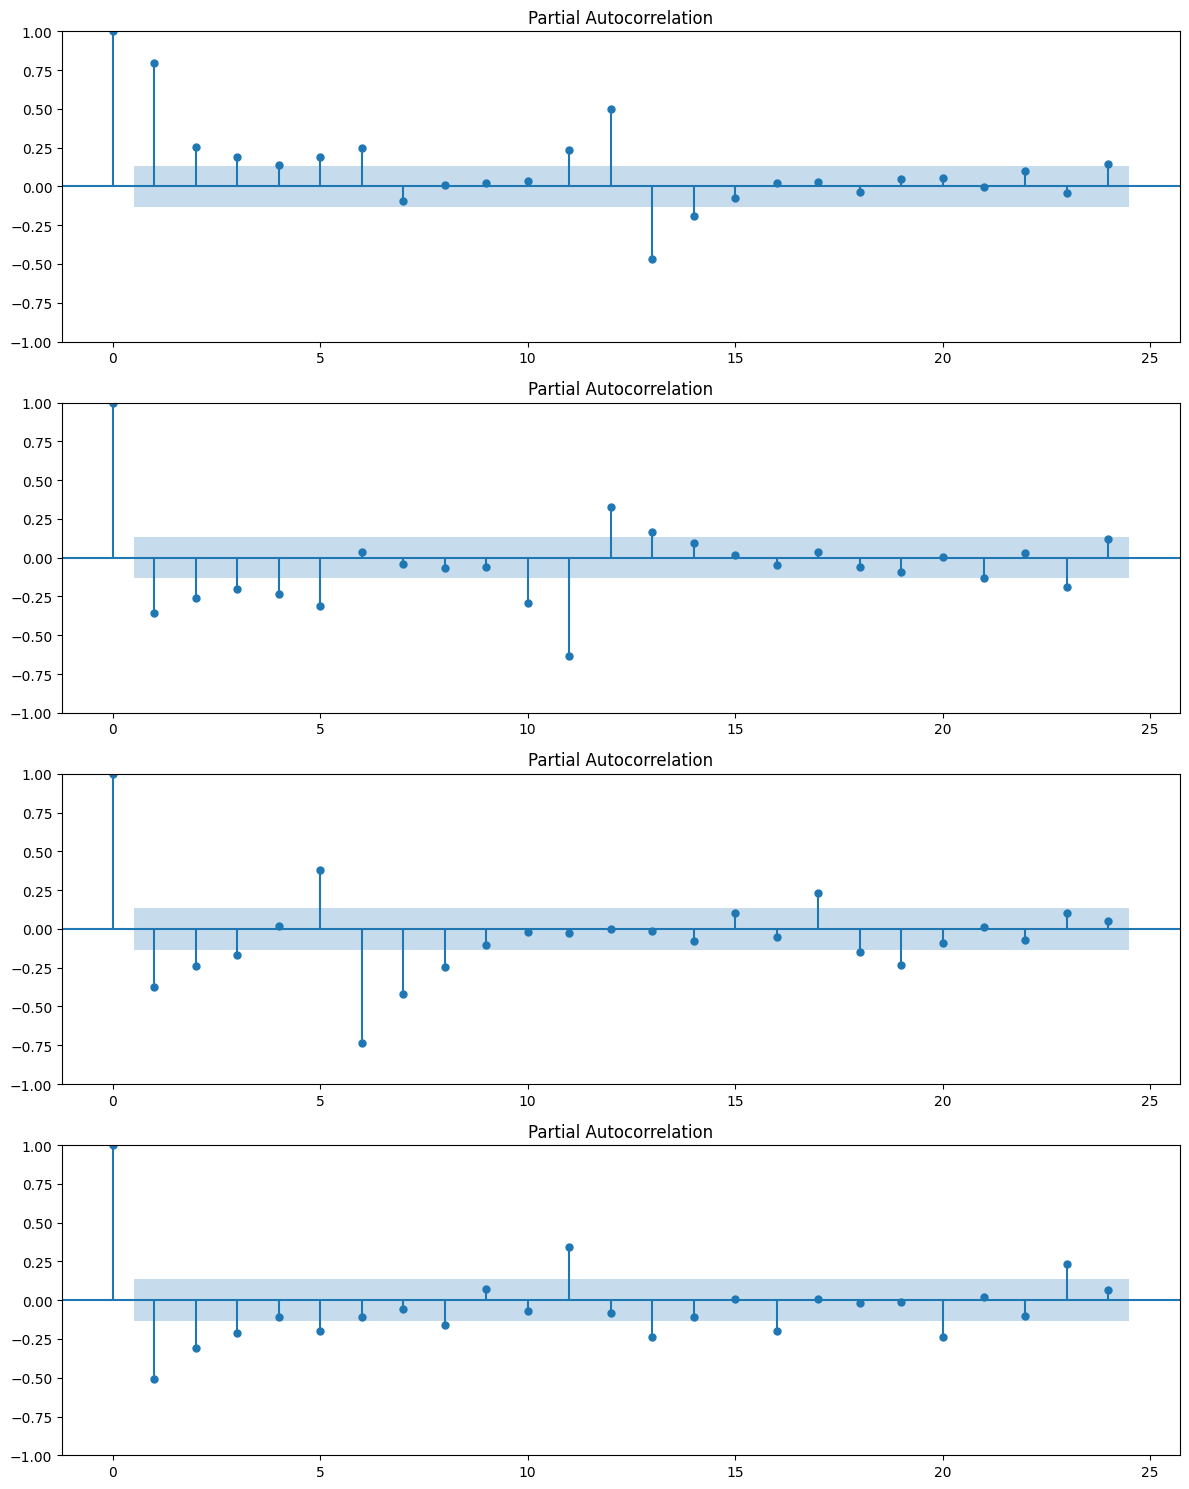

In [479]:
plot_pacf(mynsal.Sales,ax=axes[0])
plot_pacf(mynsal.Sales.diff().dropna(),ax=axes[1])
plot_pacf(mynsal.Sales.diff().diff(6).dropna(),ax=axes[2])
plot_pacf(mynsal.Sales.diff().diff(12).dropna(),ax=axes[3])
plt.tight_layout()
plt.show()

In [521]:
from statsmodels.tsa.arima.model import ARIMA

In [523]:
train_x = mynsal.copy()
adftest(train_x.Sales.diff().dropna())

Stationary


In [549]:
train_x.Sales

DATE
2001-01-01     6802.44
2001-02-01     6802.44
2001-03-01     7332.00
2001-04-01     7332.00
2001-05-01     8240.00
                ...   
2018-09-01    13838.00
2018-10-01    15351.00
2018-11-01    15615.00
2018-12-01    15809.40
2019-01-01    12160.00
Name: Sales, Length: 217, dtype: float64

In [575]:
adftest(train_x.Sales)

Not Stationary


In [789]:
model = ARIMA(train_x.Sales,order=(3,1,6))

In [791]:
model=model.fit()

In [792]:
Xtest["ARIMAPreds"] = model.forecast(steps=12).tolist()

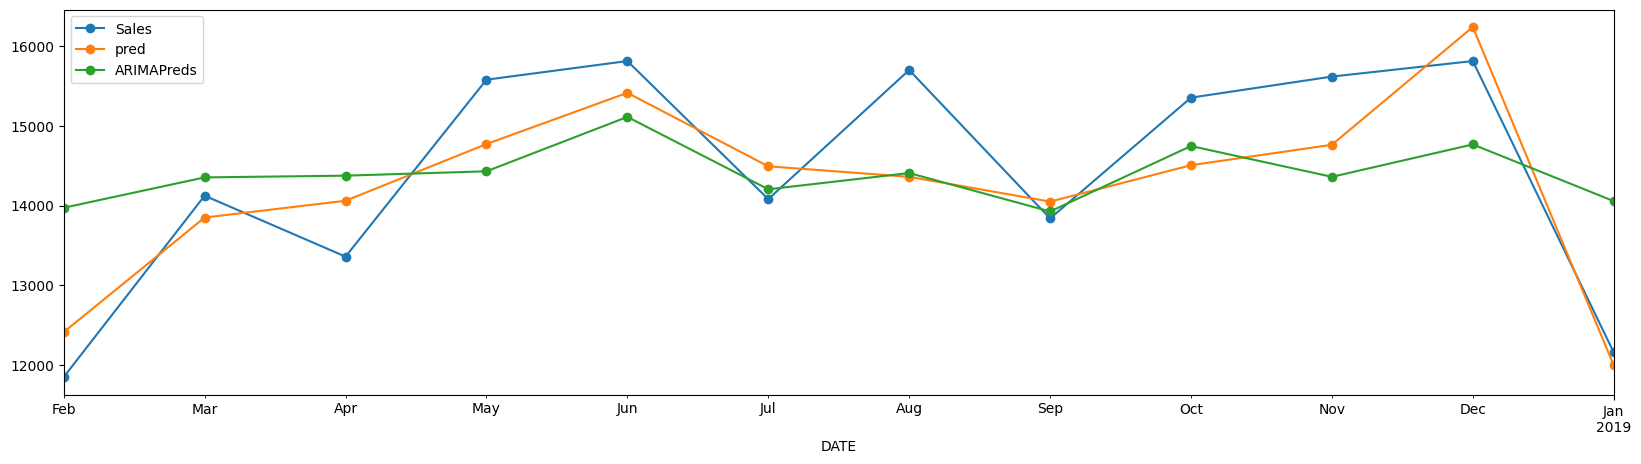

RMSE = 1143.657556051568
MAPE = 0.06900080685126954
MAE = 959.3927690067197


In [795]:
Xtest.plot(style="-o",figsize=(20,5))
plt.show()
error_cal(Xtest.Sales,Xtest.ARIMAPreds)


In [803]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

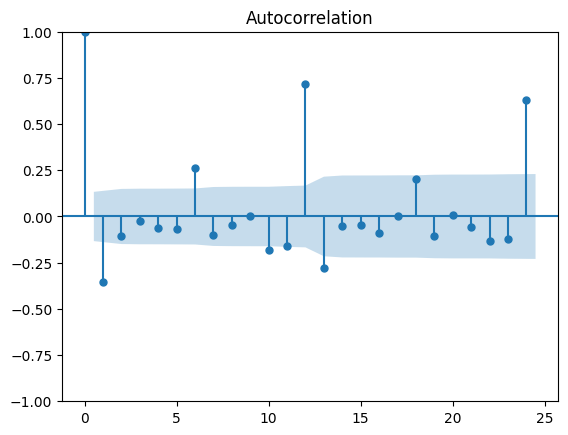

In [809]:
plot_acf(train_x.Sales.diff().dropna())
plot_acf(train_x.Sales.diff().dropna())
plt.show()

In [827]:
model = SARIMAX(train_x.Sales,order=(3,1,3),seasonal_order=(1,1,1,12))

In [829]:
model=model.fit()

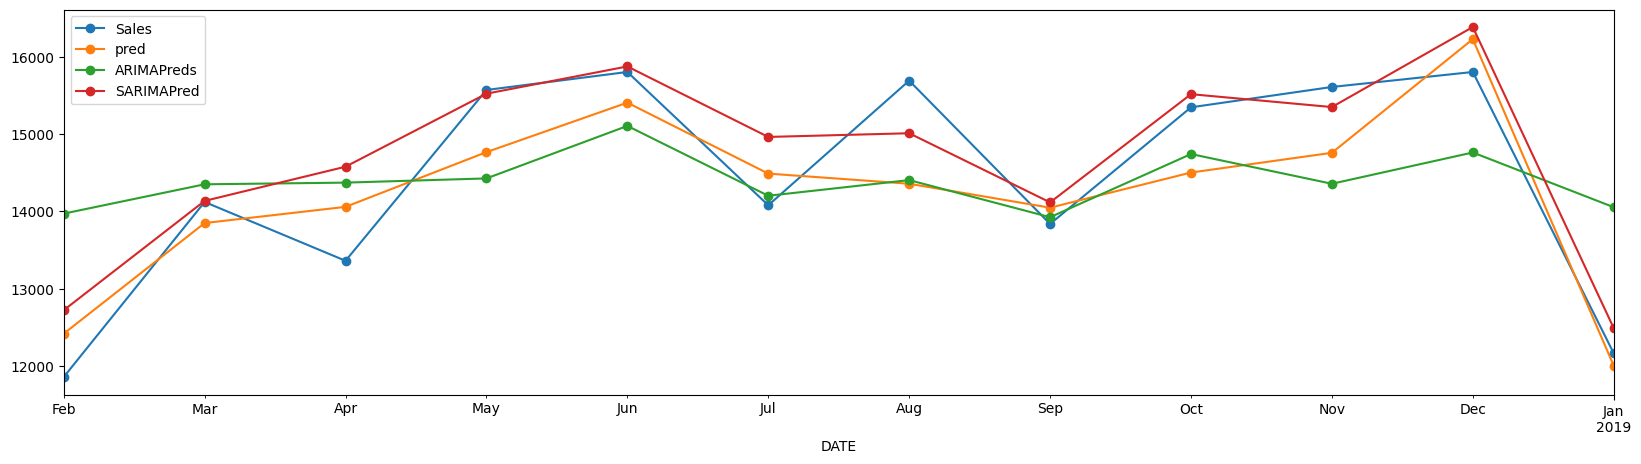

Sarima
RMSE = 586.114847130029
MAPE = 0.03260724707177724
MAE = 450.8778095394421
Arima
RMSE = 1143.657556051568
MAPE = 0.06900080685126954
MAE = 959.3927690067197
reg
RMSE = 667.3541927352873
MAPE = 0.039644253777533896
MAE = 582.1721778492806


In [839]:
predsari = model.forecast(steps=12).to_list()
Xtest["SARIMAPred"]=predsari
Xtest.plot(style='-o',figsize=(20,5))
plt.show()
print("Sarima")
error_cal(Xtest.Sales,Xtest.SARIMAPred)
print("Arima")
error_cal(Xtest.Sales,Xtest.ARIMAPreds)
print("reg")
error_cal(Xtest.Sales,Xtest.pred)